In [115]:
# Importing the libraries for exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Loading the dataset 
dataset=pd.read_csv('stroke.csv',na_values="Unknown")

In [117]:
# Gathering information about the null values and dtypes of variables
dataset.info()
# Some 'BMI' and 'smoking_status' values are missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [118]:
# dropping irrelevant feature 'id'
dataset=dataset.drop('id',axis=1)

In [119]:
# Counting duplicated rows
dataset.duplicated().sum()

0

In [120]:
# Examining basic descriptive statistics data
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [121]:
# Counting the missing data
def null_counter(columns,dataset):
    col_names=list(columns)
    counts=[]
    for n in col_names:
        counts.append(dataset[n].isnull().sum())
    null_counts=pd.DataFrame({'col_name':col_names,'null_count':counts})
    null_counts=null_counts[null_counts.null_count!=0]
    return null_counts
null_counter(dataset.columns.values,dataset)

,col_name,null_count
8,bmi,201
9,smoking_status,1544


In [122]:
# 'bmi' missing values can be imputed with the mean, because there aren't that many of them
dataset['bmi']=dataset['bmi'].fillna(dataset['bmi'].mean())

In [123]:
# 'smoking_status' has a ton of missing values. Hence, these should be imputed with predicted values
# Mapping 'smoking_status'
dataset_smoking=dataset.copy()
dataset_smoking=dataset_smoking.dropna()
pd.options.mode.chained_assignment=None
dataset_smoking['smoking_status']=dataset_smoking['smoking_status'].map({'never smoked':0,'formerly smoked':1,'smokes':2})

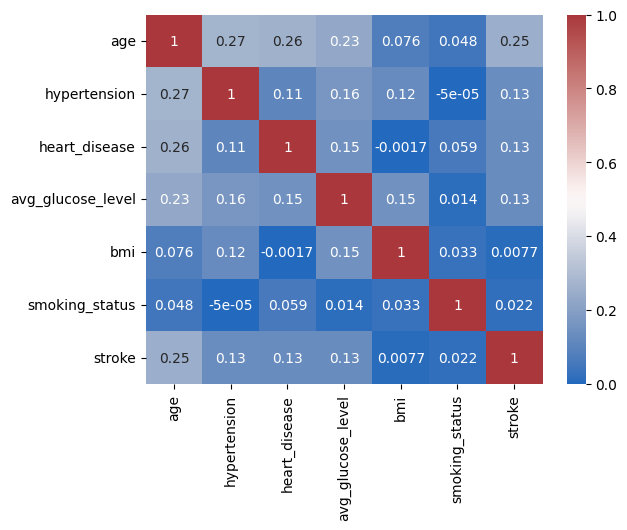

In [124]:
# Examining correlation between different variables
sns.heatmap(dataset_smoking.corr(numeric_only=True),cmap='vlag',annot=True)
plt.show()

In [125]:
# 'smoking_status' has a lot of NaNs and is not correlated with any variable. Therefore the whole column should be dropped.
dataset=dataset.drop('smoking_status',axis=1)

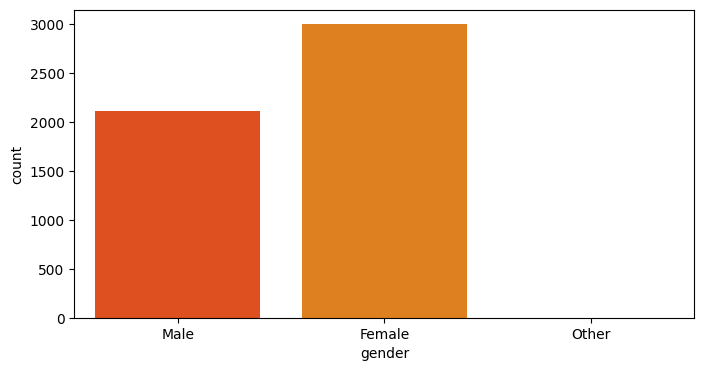

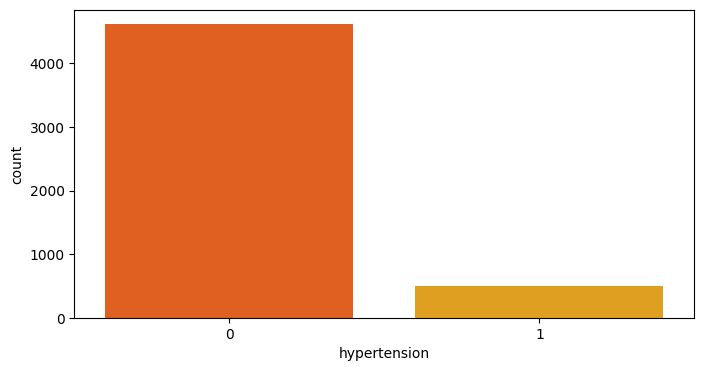

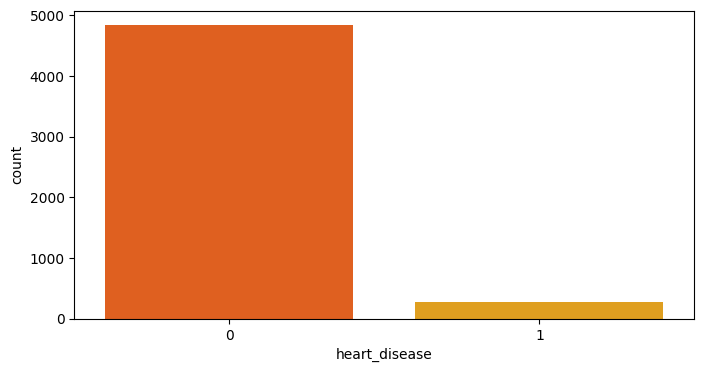

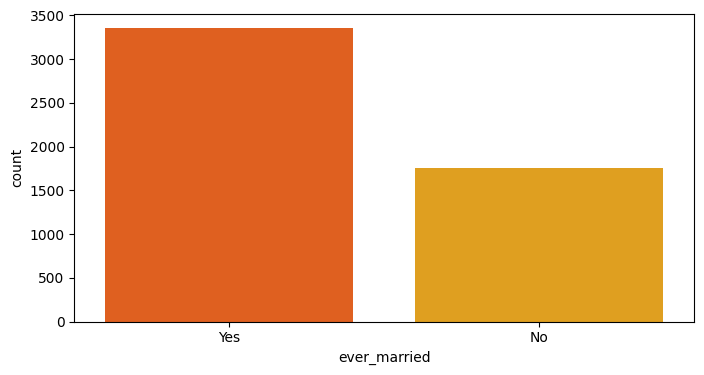

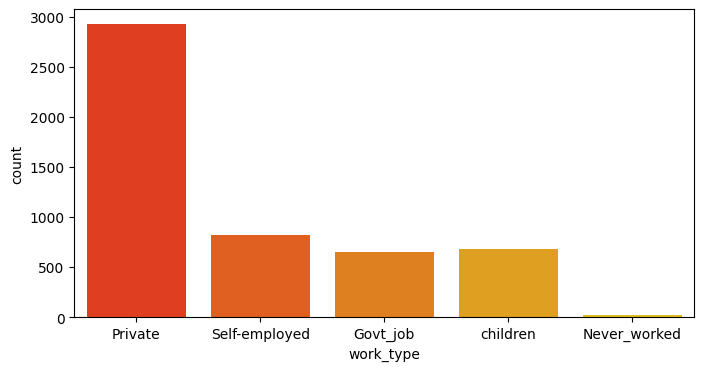

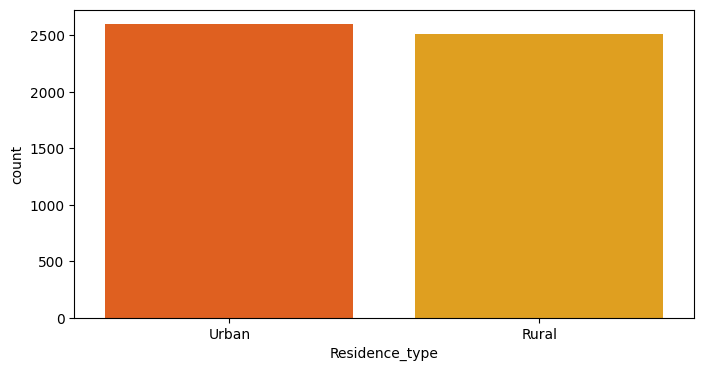

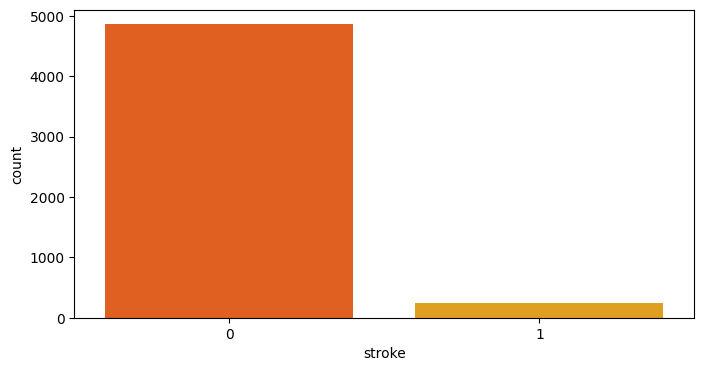

In [126]:
# Examining categorical data distribution and its relation to target variable
cats=['gender','hypertension','heart_disease', 'ever_married','work_type', 'Residence_type','stroke']
for n in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(data=dataset,x=n,palette='autumn')
    plt.show()

In [127]:
# Counting 'Other' values in 'Gender'
len(dataset[dataset['gender']=='Other'])

1

In [128]:
# Dropping 'Other' values, because there is only one of those present (treating it as an outlier/error)
dataset=dataset[dataset.gender!='Other']

In [129]:
# Counting 'never_worked' values in 'work_type'
len(dataset[dataset['work_type']=='Never_worked'])

22

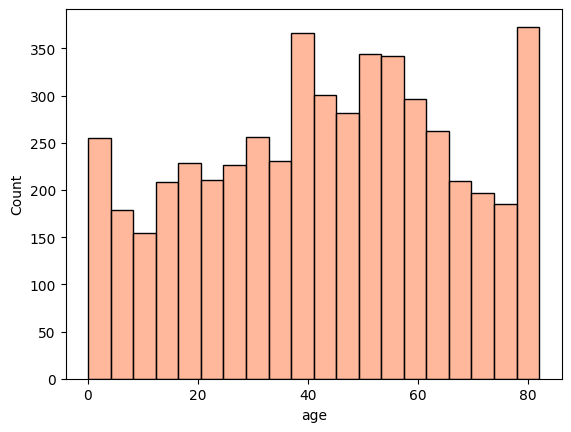

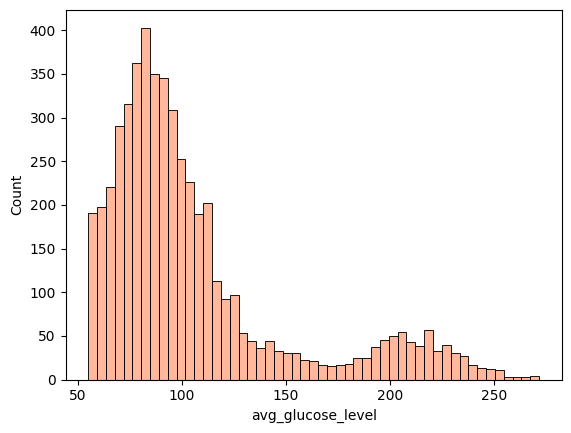

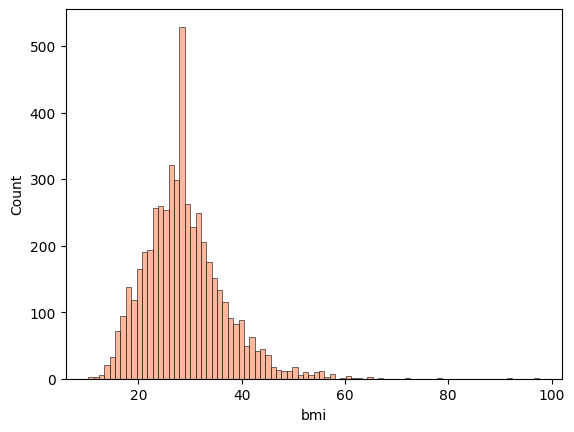

In [130]:
# Examining numerical data
nums=['age','avg_glucose_level','bmi']
for n in nums:
    sns.histplot(dataset,x=n,color='lightsalmon')
    plt.show()

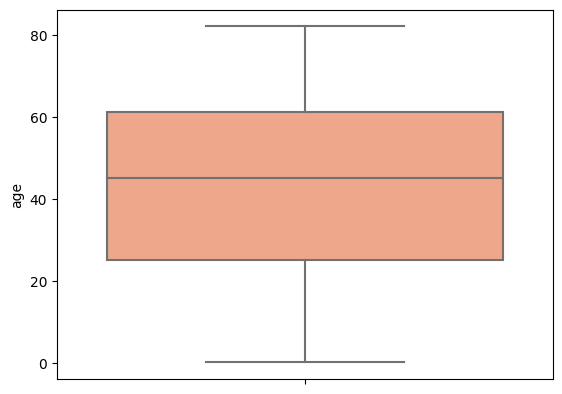

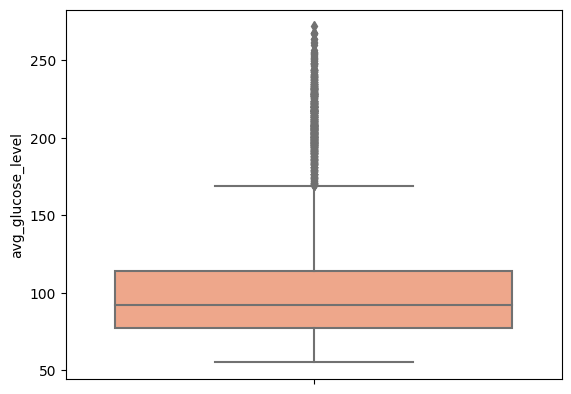

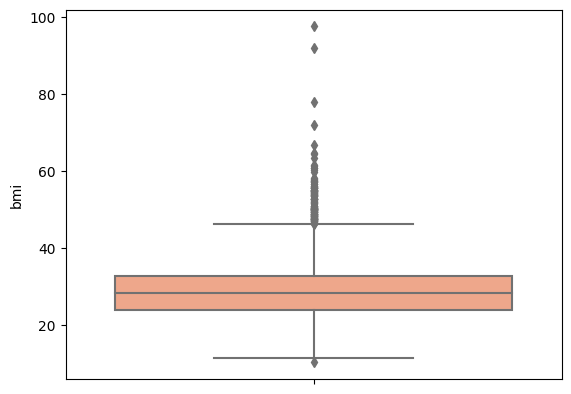

In [131]:
# Examining the outliers
for n in nums:
    box=sns.boxplot(y=dataset[n],color='lightsalmon')
    plt.show()

In [132]:
# Removing the most extreme outliers
dataset=dataset[dataset['bmi']<=80]
dataset=dataset[dataset['avg_glucose_level']<=260]

In [133]:
# Mapping categorical binary values
cats=['gender','ever_married','Residence_type']
maps=[{'Male':0,'Female':1},
{'Yes':1,'No':0},
{'Urban':0,'Rural':1}]
for n in cats:
   dataset[n]=dataset[n].map(maps[cats.index(n)])

In [134]:
# Mapping 'work_type' values
work_type=pd.get_dummies(dataset['work_type'],drop_first=True)
dataset=dataset.drop(['work_type'],axis=1)
dataset=pd.concat([dataset,work_type],axis=1)
dataset.sample(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Never_worked,Private,Self-employed,children
1709,0,35.0,0,0,1,1,92.82,28.6,0,0,1,0,0
4237,1,63.0,0,0,1,0,69.46,26.6,0,0,0,1,0
4114,0,26.0,0,0,0,0,64.68,23.3,0,0,1,0,0
5038,0,55.0,0,0,1,0,65.33,29.7,0,0,0,0,0
894,0,81.0,1,0,1,0,231.19,31.6,0,0,0,1,0


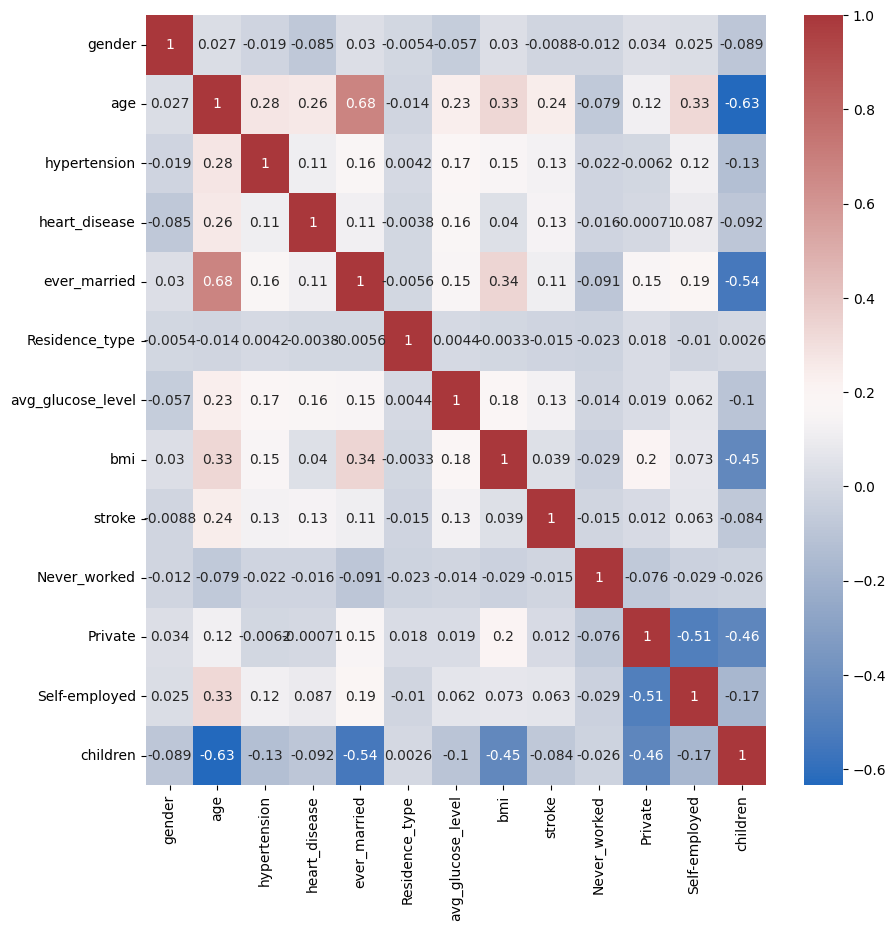

In [135]:
# Examining correlation between different variables
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only=True),cmap='vlag',annot=True)
plt.show()

In [136]:
# Splitting the dataset into features and dependent variable dataframes
X=dataset.drop('stroke',axis=1)
y=dataset['stroke']

In [137]:
# Performing the train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2)

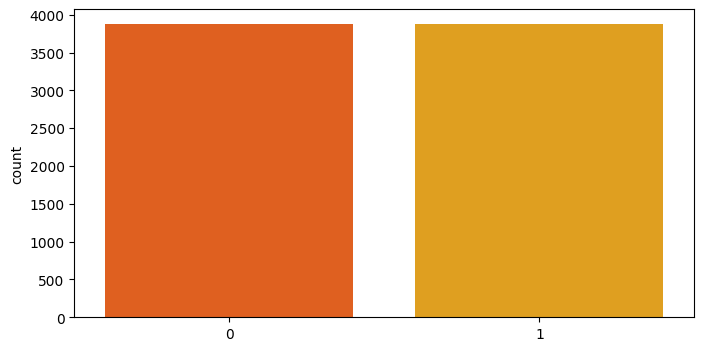

In [138]:
# The dataset is imbalanced. This problem can be solved with oversampling (undersampling would take away too many oobservations).
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train.ravel())
plt.figure(figsize=(8,4))
sns.countplot(x=y_train,palette='autumn')
plt.show()

In [139]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train[['age','avg_glucose_level','bmi']]=std.fit_transform(X_train[['age','avg_glucose_level','bmi']])
X_test[['age','avg_glucose_level','bmi']]=std.fit_transform(X_test[['age','avg_glucose_level','bmi']])

In [140]:
# The predicted values is categorical, and most of the features are also categorical. Therefore, the classifiers to try out are: 
# Support Vector, K-Neighbors, Decision Tree, Random Forest and XGBoost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [141]:
# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [142]:
# Support Vector
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(f'{accuracy_score(y_test,y_pred)}\n{confusion_matrix(y_test,y_pred)}')

0.7049019607843138
[[691 280]
 [ 21  28]]


In [143]:
# K-Neighbors
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
print(f'{accuracy_score(y_test,y_pred)}\n{confusion_matrix(y_test,y_pred)}')

0.75
[[743 228]
 [ 27  22]]


In [144]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(f'{accuracy_score(y_test,y_pred)}\n{confusion_matrix(y_test,y_pred)}')

0.7774509803921569
[[778 193]
 [ 34  15]]


In [145]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(f'{accuracy_score(y_test,y_pred)}\n{confusion_matrix(y_test,y_pred)}')

0.8313725490196079
[[836 135]
 [ 37  12]]


In [114]:
# XGBoost
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
print(f'{accuracy_score(y_test,y_pred)}\n{confusion_matrix(y_test,y_pred)}')

0.7186274509803922
[[712 259]
 [ 28  21]]


In [33]:
# The overwhelming amount of false negative predictions is caused by the fact that the dataset is imbalanced.
# There is not much that can be done here. However, hyperparameter tuning of the most promising classifiers might help tackle the issue, at least partially.
from sklearn.model_selection import GridSearchCV

In [147]:
# Support Vector hyperparameter tuning
svc_tuned=GridSearchCV(estimator=SVC(),param_grid=[{
'C':[0.1,1,10,100],
'kernel':['linear','poly','rbf','sigmoid'],
'gamma':['scale','auto']
}],scoring='balanced_accuracy')
svc_tuned.fit(X_train,y_train)
y_pred_tuned=svc_tuned.predict(X_test)
print(f'{accuracy_score(y_test,y_pred_tuned)}\n{confusion_matrix(y_test,y_pred_tuned)}\n{svc_tuned.best_params_}')

0.7509803921568627
[[739 232]
 [ 22  27]]
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [150]:
# K-Neighbors hyperparameter tuning
kn_tuned=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=[{
'n_neighbors':list(range(1,10)),
'weights':['uniform','distance'],
'algorithm':['ball_tree','kd_tree','brute'],
'leaf_size':[5,10,15],
'p':[1,2],
'metric':['cityblock','euclidean'],
'n_jobs':[-1]
}],scoring='balanced_accuracy')
kn_tuned.fit(X_train,y_train)
y_pred_tuned=kn_tuned.predict(X_test)
print(f'{accuracy_score(y_test,y_pred_tuned)}\n{confusion_matrix(y_test,y_pred_tuned)}\n{kn_tuned.best_params_}')

0.8431372549019608
[[845 126]
 [ 34  15]]
{'algorithm': 'ball_tree', 'leaf_size': 5, 'metric': 'cityblock', 'n_jobs': -1, 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}


In [149]:
# Random Forest hyperparameter tuning
rf_tuned=GridSearchCV(estimator=RandomForestClassifier(),param_grid=[{
'n_estimators':[50,100,200],
'criterion':['gini','entropy','log_loss'],
'max_features':['sqrt','log2',None],
'bootstrap':[True],
'class_weight':['balanced_subsample',None],
'n_jobs':[-1]
}],scoring='balanced_accuracy')
rf_tuned.fit(X_train,y_train)
y_pred_tuned=rf_tuned.predict(X_test)
print(f'{accuracy_score(y_test,y_pred_tuned)}\n{confusion_matrix(y_test,y_pred_tuned)}\n{rf_tuned.best_params_}')

0.8333333333333334
[[840 131]
 [ 39  10]]
{'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}
